In [125]:
import pandas as pd
import os

### Datensätze zusammenführen

In [126]:
df = pd.read_csv("./01_Spreadsheets/Sales_April_2019.csv")

#Eine Liste mit den Namen der Datensätze aus 01_Spreadsheets erzeugen
files = [file for file in os.listdir("./01_Spreadsheets")]

#Leeres Dataframe
all_months_data = pd.DataFrame()

for file in files:
    #Mit jedem Durchlauf wird df der Name des nächsten einzulesenden Files übergeben
    df = pd.read_csv("./01_Spreadsheets/"+file)
    
    #df_mit_all_months_data verknüpfen
    all_months_data = pd.concat([all_months_data, df])

In [127]:
#kombiniertes Dataframe als csv abspeichern
all_months_data.to_csv("all_data.csv", index = False)

In [128]:
#alternative Methode, um zu prüfen, 
#ob alle Zeilen der einzelnen Spreadsheets in dem neuen df enthalten sind:

sum_rows = 0

for file in files:
    df = pd.read_csv("./01_Spreadsheets/"+file)
    sum_rows += len(df)
    
print(len(all_months_data))    
print(sum_rows)

186850
186850


In [129]:
#Neues df mit all_data erzeugen, damit nicht jedes mal das csv neu erzeugt werden muss
all_data = pd.read_csv("all_data.csv")

### Daten bereinigen und Transformieren

In [130]:
#NaN anzeigen
all_data[all_data.isna().any(axis=1)]

#how = all oder any
all_data = all_data.dropna(how="all")

### Spalte "Monat" hinzufügen

In [131]:
#Die ersten beiden Zeichen aus Order Date nehmen und in Month schreiben
all_data["Month"] = all_data["Order Date"].str[0:2]

In [132]:
#Da wir alle Spreadsheets kombiniert haben, 
#haben wir anscheinend auch Überschriften mit kombiniert

#Alle Zeilen mit Überschriften entfernen
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

### Umsatz Spalte hinzufügen

In [133]:
#Alle Werte sind Objekte -> Strings?
#-> Umformen der numerischen Werte, um damit zu rechnen
all_data.dtypes

all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])

In [134]:
all_data["Umsatz"] = all_data["Price Each"] * all_data["Quantity Ordered"]

In [135]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Umsatz
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09,379.99


### In welchem Monat wurde am meisten Umsatz gemacht?

In [136]:

ergebnisse = all_data.groupby(["Month"]).sum()

Text(0.5, 0, 'Monat')

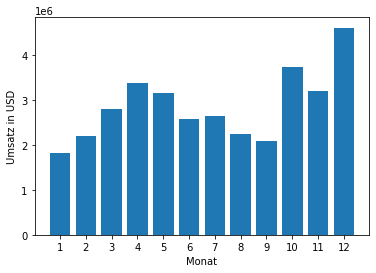

In [137]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months, results["Umsatz"])

#so schreiben, damit alle Monate beschriftet werden
plt.xticks(months)

plt.ylabel("Umsatz in USD")
plt.xlabel("Monat")

### Welcher Standort hat am meisten Umsatz generiert?